# Experiment 13
We want to evaluate Ri computation with constant attribute

## Create altered dataset

In [1]:
import sys
sys.path.append('../..')

In [2]:
import deepmatcher as dm
import pandas as pd
import torch
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [35]:
train_df = pd.read_csv('../../Structured/itunes-amazon/train.csv')

In [36]:
train_df['ltable_Price'] = "Ignore"
train_df['rtable_Price'] = "Ignore"

In [37]:
!mkdir temp

mkdir: cannot create directory ‘temp’: File exists


In [38]:
train_df.to_csv('temp/train_constantprice.csv',index=False)

## Train model and calculate Ri

In [5]:
train,validation,test = dm.data.process('temp',train='train_constantprice.csv',
                                        validation='validation.csv',
                                       test='test.csv',left_prefix='ltable_',right_prefix='rtable_',cache='exp13.pth')

In [3]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
#hybrid_model.run_train(train,validation,best_save_path='../../models/itunesamazon_hybrid_constantprice.pth',pos_neg_ratio=4,epochs=20,batch_size=16)
hybrid_model.load_state('../../models/itunesamazon_hybrid_constantprice.pth')
hybrid_model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Song_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [6]:
hybrid_model.run_eval(test)

===>  EVAL Epoch 4
Finished Epoch 4 || Run Time:    0.7 | Load Time:    0.4 || F1:  91.53 | Prec:  96.43 | Rec:  87.10 || Ex/s:  97.66



91.52542372881356

## Compute Ri

In [7]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('../../Structured/itunes-amazon/'
                                                                         ,'negatives',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [8]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('../../Structured/itunes-amazon',
                                                                       'positives',32,hybrid_model,
                                                                       hybrid_model.classifier)

In [9]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [10]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri = []
for batch in negative_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ri = current_sample_ris = find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[4],class_to_reach=1)
        negatives_ri.append(current_sample_ri)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

Processing sample 378
Processing sample 379
Processing sample 380
Processing sample 381
Processing sample 382
Processing sample 383
Processing sample 384
Processing sample 385
Processing sample 386
Processing sample 387
Processing sample 388
Processing sample 389
Processing sample 390
Processing sample 391
Processing sample 392
Processing sample 393
Processing sample 394
Processing sample 395
Processing sample 396
Processing sample 397
Processing sample 398
Processing sample 399
Processing sample 400
Processing sample 401
Processing sample 402
Processing sample 403
Processing sample 404
Processing sample 405
Processing sample 406


In [11]:
ri_norms_negative_samples = []
for ri in negatives_ri:
    ri_norms_negative_samples.append(torch.norm(ri).data[0])
neg_variation_df = pd.DataFrame(data = ri_norms_negative_samples,columns = ['Price'])
neg_variation_df.head(10)

,Price
0,3.749774
1,8.312891
2,8.273142
3,8.270634
4,7.923174
5,7.796748
6,8.624544
7,13.082141
8,7.842767
9,8.472125


In [14]:
from scipy.stats import kstest
kstest(neg_variation_df['Price'],'norm')

KstestResult(statistic=0.9653386295090034, pvalue=0.0)

In [27]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri = []
for batch in positive_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ri = current_sample_ris = find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[4]
                                                                                    ,class_to_reach=0)
        positives_ri.append(current_sample_ri)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

In [31]:
ri_norms_positive_samples = []
for ri in positives_ri:
    ri_norms_positive_samples.append(torch.norm(ri).data[0])
variation_pos_df = pd.DataFrame(data =ri_norms_positive_samples,columns = ['Price'])
variation_pos_df.tail(10)

,Price
122,0.000000
123,15.567692
124,13.085272
125,2.820915
126,2.657700
127,7.753742
128,12.946536
129,10.072795
130,7.607734
131,7.696025


In [40]:
! rm -r temp

In [41]:
variation_pos_df.head()

,Gen-Son,Gen-Art,Gen-Alb,Gen-Pri,Gen-Cop,Gen-Tim,Gen-Rel
0,2.400168,3.271580,2.831830,2.292891,3.141664,1.739190,3.580072
1,3.743701,4.987300,4.367309,3.683948,4.715356,1.911734,5.328947
2,3.877554,5.257379,4.511127,3.632184,5.149188,2.776563,5.678788
3,6.821429,9.472612,7.955276,6.443750,9.441951,4.030622,10.085423
4,7.139969,10.196482,8.417581,6.537127,10.758584,4.926408,11.112793


In [42]:
from scipy.stats import kstest

In [49]:
for col in list(variation_pos_df):
    print(variation_pos_df[col].mean())

3.4000537664659563
4.634881623329655
4.014316831865618
3.23825285127086
4.565991144026479
2.4156884031911052
4.990320594080033


In [51]:
kstest(variation_pos_df['Gen-Cop'],'lognorm')

TypeError: _parse_args() missing 1 required positional argument: 's'

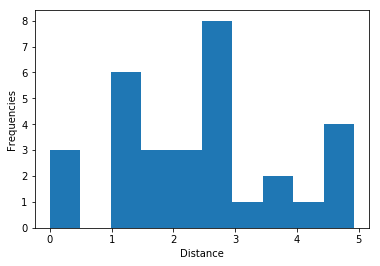

In [60]:
import matplotlib.pyplot as plt
x = variation_pos_df['Gen-Tim']
fig = plt.figure()
plt.hist(x, bins=10)
plt.xlabel("Distance")
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_standardencoding.png')

In [58]:
variation_pos_df.head(10)

,Gen-Son,Gen-Art,Gen-Alb,Gen-Pri,Gen-Cop,Gen-Tim,Gen-Rel
0,2.400168,3.271580,2.831830,2.292891,3.141664,1.739190,3.580072
1,3.743701,4.987300,4.367309,3.683948,4.715356,1.911734,5.328947
2,3.877554,5.257379,4.511127,3.632184,5.149188,2.776563,5.678788
3,6.821429,9.472612,7.955276,6.443750,9.441951,4.030622,10.085423
4,7.139969,10.196482,8.417581,6.537127,10.758584,4.926408,11.112793
5,3.628982,5.023585,4.316590,3.409490,4.951978,2.530789,5.579182
6,3.900857,5.159257,4.488623,3.688363,4.902045,2.834462,5.512400
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1.447506,1.827793,1.628657,1.438763,1.694015,1.164686,1.908162
